In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [47]:
data = pd.read_excel("1-6.xlsx")

In [48]:
data.head()

,info,id
0,286-69-1076,1
1,256-80-1815,1
2,398-21-8862,1
3,725-50-8395,1
4,882-45-5093,1


In [49]:
# shuffle the dataset
df = data.sample(frac = 1) 

In [50]:
#df["info"] = df["info"].astype(str) # Convert SSN to string
#data["info"] = data["info"].apply(lambda x: x.replace("-", ""))

In [51]:
df.head()

,info,id
5145,SRC-19-10-10146,6
1845,477344072074,2
4329,ME129816D,5
1751,468635064073,2
1633,152411823449,2


In [60]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#le.fit(df['info'])
#df['info'] = le.transform(df['info'])

In [59]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.drop('id',axis=1))
    wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

ValueError: could not convert string to float: 'SRC-19-10-10146'

In [42]:
df.head()

,info,id
4078,5185,5
2660,3231,3
2518,2120,3
5439,5626,6
3423,2218,4


In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore') 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['id']]).toarray())
final_df = df.join(encoder_df)

print(final_df)

      info  id    0    1    2    3    4    5
4078  5185   5  0.0  0.0  0.0  1.0  0.0  0.0
2660  3231   3  0.0  0.0  1.0  0.0  0.0  0.0
2518  2120   3  0.0  0.0  1.0  0.0  0.0  0.0
5439  5626   6  0.0  0.0  0.0  0.0  1.0  0.0
3423  2218   4  0.0  0.0  1.0  0.0  0.0  0.0
...    ...  ..  ...  ...  ...  ...  ...  ...
1528  2360   2  0.0  1.0  0.0  0.0  0.0  0.0
1084  3780   2  0.0  1.0  0.0  0.0  0.0  0.0
5060  5120   6  1.0  0.0  0.0  0.0  0.0  0.0
448   3480   1  0.0  0.0  0.0  1.0  0.0  0.0
3822  2296   4  1.0  0.0  0.0  0.0  0.0  0.0

[5999 rows x 8 columns]


In [44]:
#drop 'team' column
final_df.drop('id', axis=1, inplace=True)

#view final df
print(final_df)

      info    0    1    2    3    4    5
4078  5185  0.0  0.0  0.0  1.0  0.0  0.0
2660  3231  0.0  0.0  1.0  0.0  0.0  0.0
2518  2120  0.0  0.0  1.0  0.0  0.0  0.0
5439  5626  0.0  0.0  0.0  0.0  1.0  0.0
3423  2218  0.0  0.0  1.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...
1528  2360  0.0  1.0  0.0  0.0  0.0  0.0
1084  3780  0.0  1.0  0.0  0.0  0.0  0.0
5060  5120  1.0  0.0  0.0  0.0  0.0  0.0
448   3480  0.0  0.0  0.0  1.0  0.0  0.0
3822  2296  1.0  0.0  0.0  0.0  0.0  0.0

[5999 rows x 7 columns]


In [19]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df['info'], df.drop('info', axis=1), test_size=0.1)

In [21]:
X = data['info'].values.reshape(-1,1)
y = data['id']

In [30]:
X_train

3488    1977
5117    4969
4201    5284
5517    4998
613     1762
        ... 
2136      37
4247    5790
5864    5354
192      365
2831    3847
Name: info, Length: 5399, dtype: int64

In [23]:
kmeans = KMeans(n_clusters=6)

In [24]:
kmeans.fit(X_train)

/Users/anthony/opt/anaconda3/envs/intone/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [25]:
y_pred = kmeans.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print("Accuracy:", accuracy_score(X_test, y_pred))

Accuracy: 0.0


In [28]:
kmeans.predict([[691731457]])

/Users/anthony/opt/anaconda3/envs/intone/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

ValueError: ignored

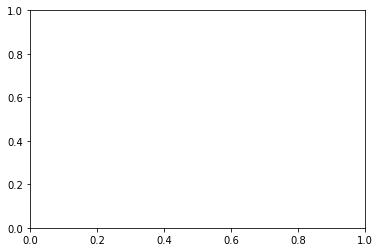

In [ ]:
plt.scatter(X_train, y_train, c=y_pred, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 0], c='black', s=200, alpha=0.5)
plt.show()